## Steps:
- Preprocessing
- Filter and Trim
- Dereplicate
- Learn Error Rates
- Infer sample composition
- Merge paired reads
- Remove chimeras
- Assign Taxonomy

Load package and set path:

Load package dada2. 
Set the options:
    - set.seed: Generate random pseudonumbers

In [2]:
library(dada2) 

Loading required package: Rcpp



In [3]:
set.seed(100)

### Let's find out where we are on the computer:
    - Get the working directory:
    in my case it is '/home/usuario/Documentos/YARINACOCHA'. 

In [5]:
getwd()

[1] "/home/usuario/Documentos/YARINACOCHA"

     - Set the path to the fastq files:

In [9]:
path <- '/home/usuario/Documentos/YARINACOCHA'

### Get a list of all fastq files in the fastq" directory and separate R1 and R2

In [11]:
fnFs <- sort(list.files(path, pattern="_R1.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2.fastq", full.names = TRUE))

### Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq

In [12]:
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

### Specify the full path to the fnFs and fnRs:
THE FILTERED READS WILL BE PLACED IN THE DIRECTORY "FILTERED".

In [13]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

### Let's visualize how you’re reads are doing:
    -DADA2 allows quality plotting of Forward and Reverse reads.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


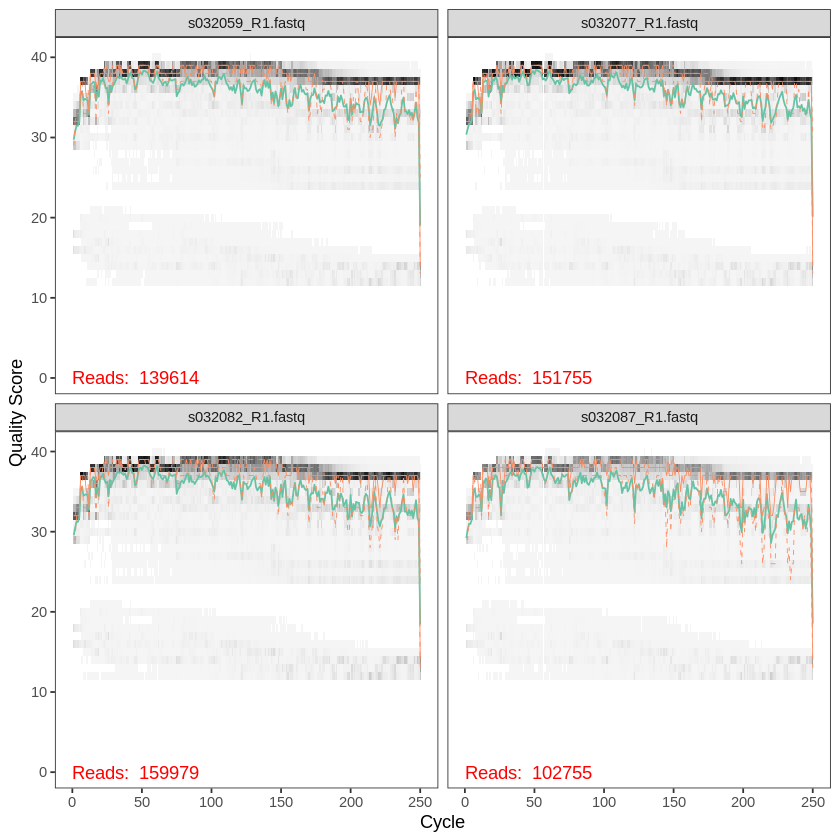

In [14]:
plotQualityProfile(fnFs)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


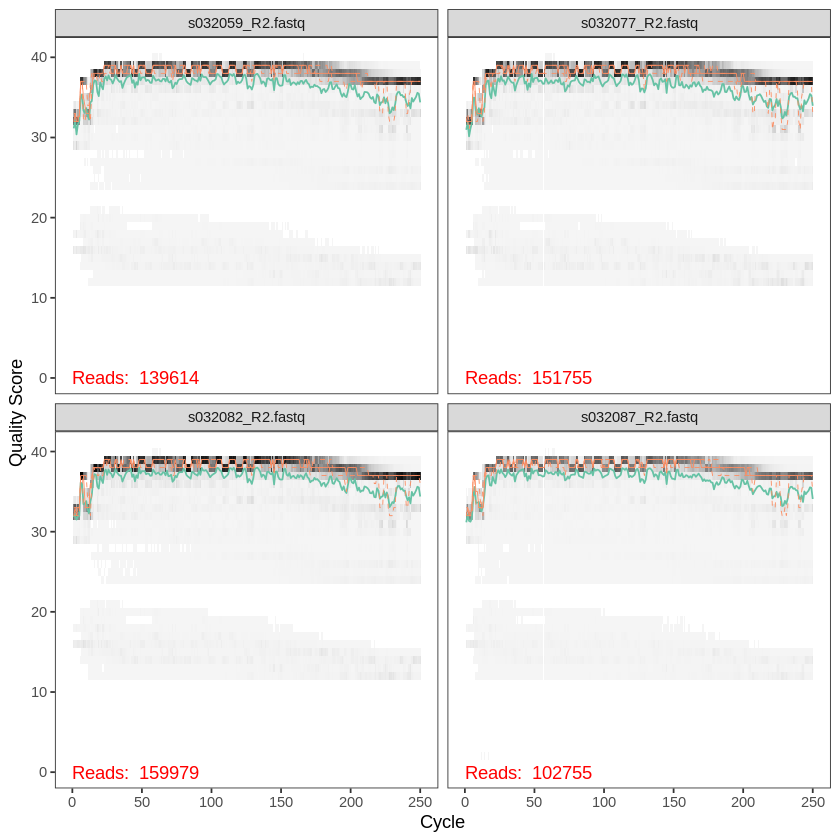

In [15]:
plotQualityProfile(fnRs)

## Filter and Trim the forward and reverse reads : 
We’ll use standard filtering parameters: maxN=0 (DADA2 requires no Ns), truncQ=2, rm.phix=TRUE and maxEE=2.
The maxEE parameter sets the maximum number of “expected errors” allowed in a read, which is a better filter than simply averaging quality scores.

I’m going to cut the forward reads at 225 and the reverse reads at 250

TrimLeft for remove adapters

In [16]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, maxN=0, rm.phix=TRUE, maxEE = 2, truncLen = c(225,250), trimLeft = c(17,21), compress=TRUE, multithread=TRUE)

Creating output directory: /home/usuario/Documentos/YARINACOCHA/filtered



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


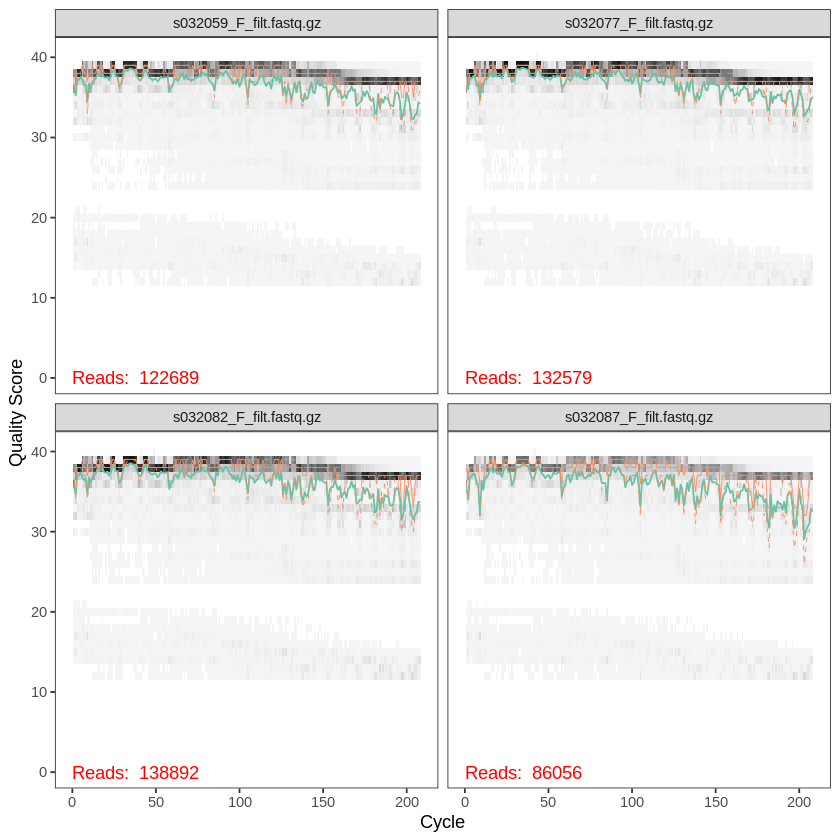

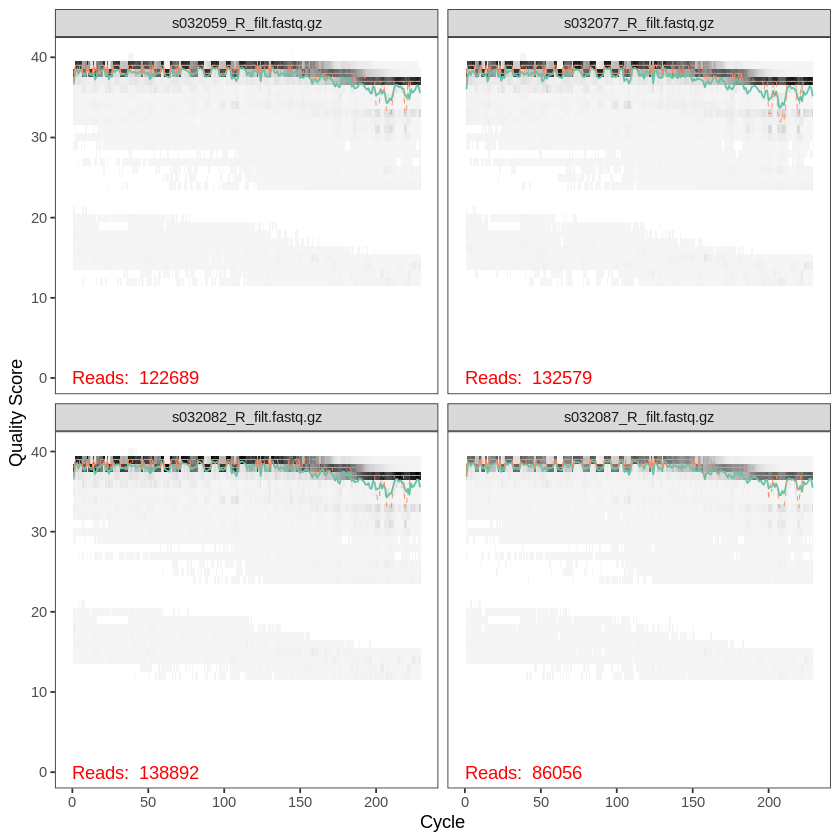

In [17]:
plotQualityProfile(filtFs)
plotQualityProfile(filtRs)

## Dereplication

In [18]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)

Dereplicating sequence entries in Fastq file: /home/usuario/Documentos/YARINACOCHA/filtered/s032059_F_filt.fastq.gz

Encountered 35917 unique sequences from 122689 total sequences read.

Dereplicating sequence entries in Fastq file: /home/usuario/Documentos/YARINACOCHA/filtered/s032077_F_filt.fastq.gz

Encountered 41126 unique sequences from 132579 total sequences read.

Dereplicating sequence entries in Fastq file: /home/usuario/Documentos/YARINACOCHA/filtered/s032082_F_filt.fastq.gz

Encountered 47384 unique sequences from 138892 total sequences read.

Dereplicating sequence entries in Fastq file: /home/usuario/Documentos/YARINACOCHA/filtered/s032087_F_filt.fastq.gz

Encountered 27911 unique sequences from 86056 total sequences read.

Dereplicating sequence entries in Fastq file: /home/usuario/Documentos/YARINACOCHA/filtered/s032059_R_filt.fastq.gz

Encountered 33020 unique sequences from 122689 total sequences read.

Dereplicating sequence entries in Fastq file: /home/usuario/Docume

## Visualize the estimated error rates

In [19]:
errF <- learnErrors(filtFs, multithread = TRUE)
errR <- learnErrors(filtRs, multithread = TRUE)

99884928 total bases in 480216 reads from 4 samples will be used for learning the error rates.
109969464 total bases in 480216 reads from 4 samples will be used for learning the error rates.


## DADA, inferring ASVs: 
### Infer sample composition

In [20]:
dadaFs <- dada(filtFs, err=errF, multithread = TRUE)
dadaRs <- dada(filtRs, err=errR, multithread = TRUE)

Sample 1 - 122689 reads in 35917 unique sequences.
Sample 2 - 132579 reads in 41126 unique sequences.
Sample 3 - 138892 reads in 47384 unique sequences.
Sample 4 - 86056 reads in 27911 unique sequences.
Sample 1 - 122689 reads in 33020 unique sequences.
Sample 2 - 132579 reads in 41817 unique sequences.
Sample 3 - 138892 reads in 43422 unique sequences.
Sample 4 - 86056 reads in 22417 unique sequences.


## Merge forward/reverse reads and get a sequence table
    -Using the function mergePairs() it's posible to merge forwards and revers reads 
    -With the function makeSequenceTable() we create a table of sequences.

In [21]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)
seqtab <- makeSequenceTable(mergers)
table(nchar(getSequences(seqtab)))

114265 paired-reads (in 871 unique pairings) successfully merged out of 119462 (in 2349 pairings) input.

112532 paired-reads (in 1062 unique pairings) successfully merged out of 125792 (in 4609 pairings) input.

119758 paired-reads (in 1076 unique pairings) successfully merged out of 132195 (in 4517 pairings) input.

78281 paired-reads (in 545 unique pairings) successfully merged out of 83342 (in 1906 pairings) input.




 229  234  235  236  239  240  242  244  247  250  251  252  253  254  255  256 
   2    1    1    2    1    1    1    1    3    1    4   13   42 1900  127   14 
 257  258  260  274  277  284  294  307  312  316  339  348  408  410  415  416 
   5    2    2    1    1    1    1    1    1    1    1    1    1    1    1    4 
 417  419  421  422  425 
  18    3    1    1    4 

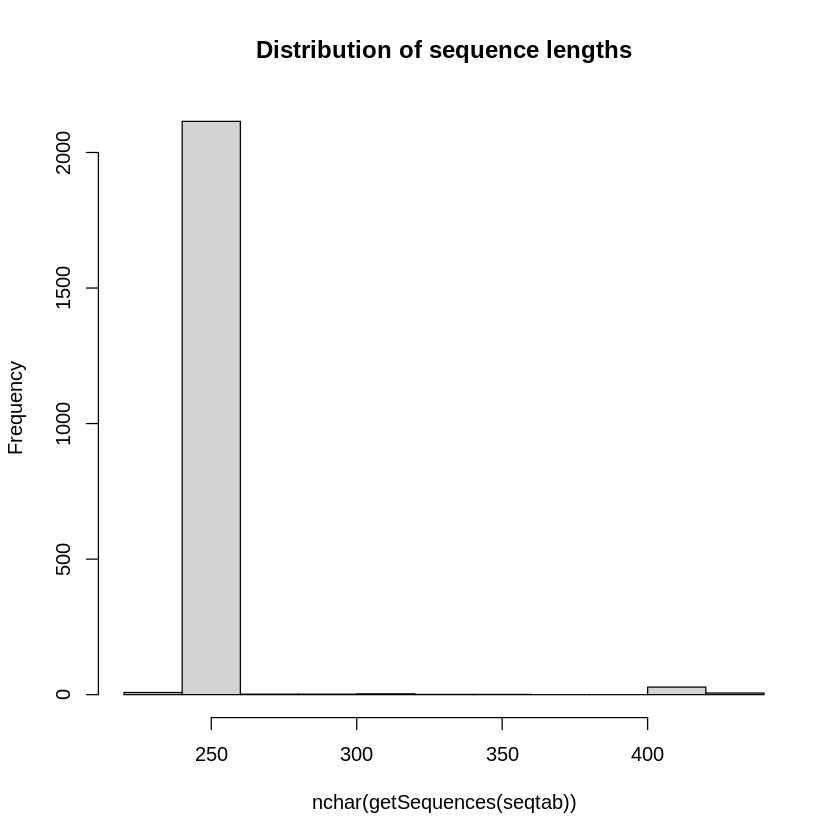

In [22]:
hist(nchar(getSequences(seqtab)), main="Distribution of sequence lengths")


 229  234  235  236  239  240  242  244  247  250  251  252  253  254  255  256 
   2    1    1    2    1    1    1    1    3    1    4   13   42 1900  127   14 
 257  258  260  274  277  284  294 
   5    2    2    1    1    1    1 

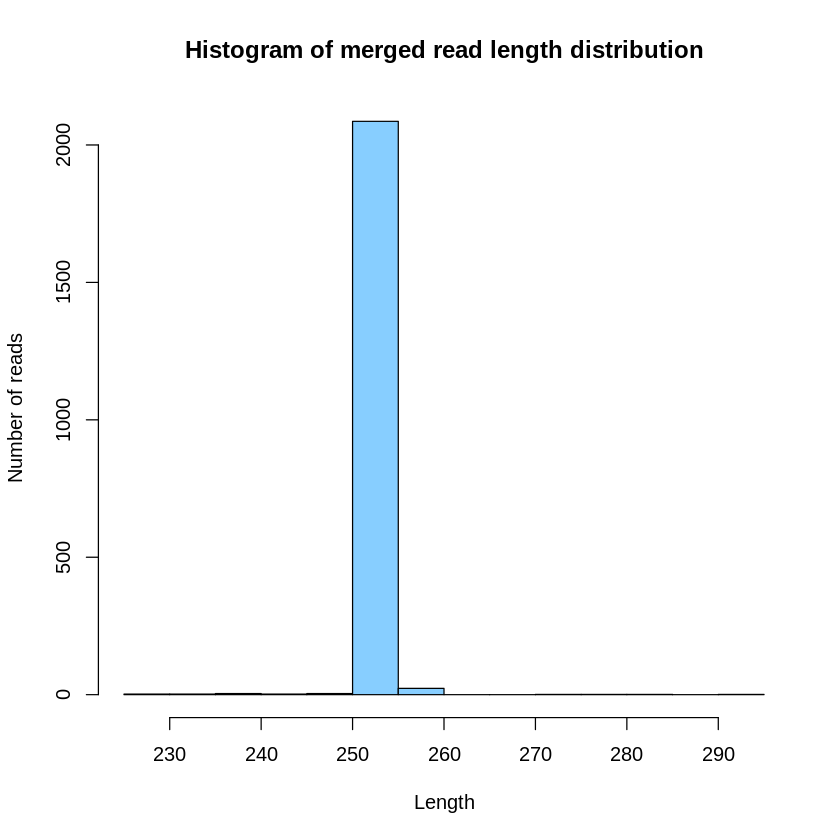

In [26]:
seqtab2 <- seqtab[,nchar(colnames(seqtab)) %in% 220:300]
table(nchar(getSequences(seqtab2)))
hist(nchar(getSequences(seqtab2)), main = "Histogram of merged read length distribution", xlab = "Length", ylab = "Number of reads", col = "skyblue1")

## Remobing quimeras 
    -Using removeBimeraDenovo: Remove quimeric sequences 
    -sum() we identifie the percentage of quimeric sequences

In [27]:
seqtab.nochim <- removeBimeraDenovo(seqtab2, method="consensus", multithread=TRUE, verbose=TRUE)
sum(seqtab.nochim)/sum(seqtab2)

Identified 668 bimeras out of 2127 input sequences.



[1] 0.8718381

In [28]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
View(track)
write.table(x = track, file = "reads-stats.txt", sep = "\t", quote = FALSE)

,input,filtered,denoisedF,denoisedR,merged,nonchim
s032059,139614,122689,121010,120420,114265,106890
s032077,151755,132579,129118,127737,112532,92562
s032082,159979,138892,135332,133995,119758,98859
s032087,102755,86056,84675,84092,78281,71725


## For save work space (checkpoint)

In [139]:
saveRDS(seqtab.nochim, "16sall.rds")
save.image("16s.RData")

## Assingation of taxonomy 

In [30]:
taxSilva <- assignTaxonomy(seqtab.nochim, '/home/usuario/Documentos/YARINACOCHA/silva_nr_v138_train_set.fa.gz', multithread=TRUE, minBoot = 80, tryRC=TRUE)

In [33]:
speciesSilva <- addSpecies(taxSilva, '/home/usuario/Documentos/YARINACOCHA/silva_species_assignment_v138.fa.gz', tryRC = TRUE, n = 10000)

## Creating a taxa table: 
    -It's a table containing taxonomy information: "Kingdom", "Phylum", "Class", "Order", "Family", "Genus"

In [34]:
write.table(taxSilva, file = "taxSilva.tsv", sep = "\t")
write.table(speciesSilva, file = "speciesSilva.tsv", sep = "\t")

## Creating main files 

## Identify ASV number: (I got 1459 ASVs):
    Each ASV correspond to a taxonomic clasification
    '>ASV_1''>ASV_2''>ASV_3''>ASV_4''>ASV_5''>ASV_6 ... '>ASV_1459'
### For example: 
    ASV Kingdom Phylum Class Order Family Genus
    ASV_1 Bacteria Cyanobacteria Cyanobacteriia Synechococcales Cyanobiaceae Cyanobium_PCC-6307
    

In [35]:
asv_seqs <- colnames(seqtab.nochim)
head(asv_seqs)

[1] "AATACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTCGTTAAAGCGTGGAGCTTAACTCCATTTGAGCGATGGAAACTGCAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGG"
[2] "AATACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCTTTTAAGTCTGTCGTTAAAGCGTGGAGCTTAACTCCATTTAAGCGATGGAAACTGGAAGGCTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGG"
[3] "AATACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCTCGTAAGTCTGTCGTTAAAGCGTGGAGCTTAACTCCATTTAGGCGATGGAAACTGTGAGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGG"
[4] "AATACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTCGTTAAAGCGTGGAGCTTAACTCCATTTAAGCGATGGAAACTGCAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGG"
[5] "AATACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTTTAAGTCTGTCGTCAAAGCGTGGAGCTTAACTCCATTTCTGCGATGGAAACTGGAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGG"
[6] "AATACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGGCGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGG"

In [36]:
asv_headers <- vector(dim(seqtab.nochim)[2], mode="character")
for (i in 1:dim(seqtab.nochim)[2]) {
  asv_headers[i] <- paste(">ASV", i, sep="_")
}
head(asv_headers)

[1] ">ASV_1" ">ASV_2" ">ASV_3" ">ASV_4" ">ASV_5" ">ASV_6"

### tax table / asv_tax 

In [37]:
asv_tax <- taxSilva
row.names(asv_tax) <- sub(">", "", asv_headers)
write.table(asv_tax, "ASVs_taxonomy.nov.tsv", sep="\t", quote=F, col.names=NA)

### tax table species / asv_tax_sp

In [38]:
asv_tax_sp <- speciesSilva
row.names(asv_tax_sp) <- sub(">", "", asv_headers)
write.table(asv_tax_sp, "ASVs_taxonomy_sp.nov.tsv", sep="\t", quote=F, col.names=NA)

### sequences: bind asv numbers and sequences

In [39]:
asv_fasta <- c(rbind(asv_headers, asv_seqs))
write(asv_fasta, "ASVs.nov.fa")

### Count table named asv_tab

In [40]:
asv_tab <- t(seqtab.nochim)
row.names(asv_tab) <- sub(">", "", asv_headers)
write.table(asv_tab, "ASVs_counts.nov.tsv", sep="\t", quote=F, col.names=NA)

# WORKING WITH METADATA

### I created a metadata called matadata_yarina in tsv format and csv format:
  #### Create a metadata in excel -> dowload in csv or tsv format

In [67]:
sample_info_tab <- read.csv("metadata_yarina.csv", header= TRUE, row.names=1,
                   check.names=FALSE, sep=",")
sample_info_tab$color <- as.character(sample_info_tab$color)
sample_info_tab

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'metadata_yarina.csv'”


,sample_id,ASVs,type,position,color
,<chr>,<int>,<chr>,<chr>,<chr>
Loc_1,L1,45861,Water,Regional,#CC79A7
Loc_2,L2,43940,Water,Regional,#56B4E9
Loc_3,L3,45326,Water,Regional,#E69F00
Loc_4,L4,28184,Water,Regional,#009E73


## REQUIRED PACKAGES 

In [68]:
library(tidyverse)
library(phyloseq)
library(vegan)
library(DESeq2)
library(dendextend)
library(viridis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The fo

## LOADING COUNT TABLE AND TAX TABLE

In [71]:
count_tab <- as.matrix(read.table("ASVs_counts.nov.tsv"), header = TRUE, row.names = 1, check.names = FALSE, sep = "\t")
head(count_tab)

,s032059_F_filt.fastq.gz,s032077_F_filt.fastq.gz,s032082_F_filt.fastq.gz,s032087_F_filt.fastq.gz
ASV_1,11283,9137,11681,11275
ASV_2,15075,770,10338,132
ASV_3,1419,13733,2066,4895
ASV_4,3805,4376,3681,7539
ASV_5,1444,3173,1369,6993
ASV_6,2578,3835,1874,3461


In [72]:
tax_tab <- as.matrix(read.table("ASVs_taxonomy.nov.tsv"), header = TRUE, row.names = 1, check.names = FALSE, sep = "\t")
head(tax_tab)

,Kingdom,Phylum,Class,Order,Family,Genus
ASV_1,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_2,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_3,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_4,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_5,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_6,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,LD29


# DESeq2

In [87]:
deseq_counts <- DESeqDataSetFromMatrix(count_tab, colData = sample_info_tab, design = ~1)
deseq_counts <- estimateSizeFactors(deseq_counts, type = "poscounts")
deseq_counts_vst <- varianceStabilizingTransformation(deseq_counts)
vst_trans_count_tab <- assay(deseq_counts_vst)
head(vst_trans_count_tab)

,Loc_1,Loc_2,Loc_3,Loc_4
ASV_1,13.16236,13.111247,13.46559,13.853259
ASV_2,13.58034,9.543689,13.28940,7.442522
ASV_3,10.17192,13.699064,10.96676,12.649600
ASV_4,11.59440,12.049263,11.79979,13.272610
ASV_5,10.19710,11.585588,10.37329,13.164156
ASV_6,11.03291,11.858910,10.82609,12.149545


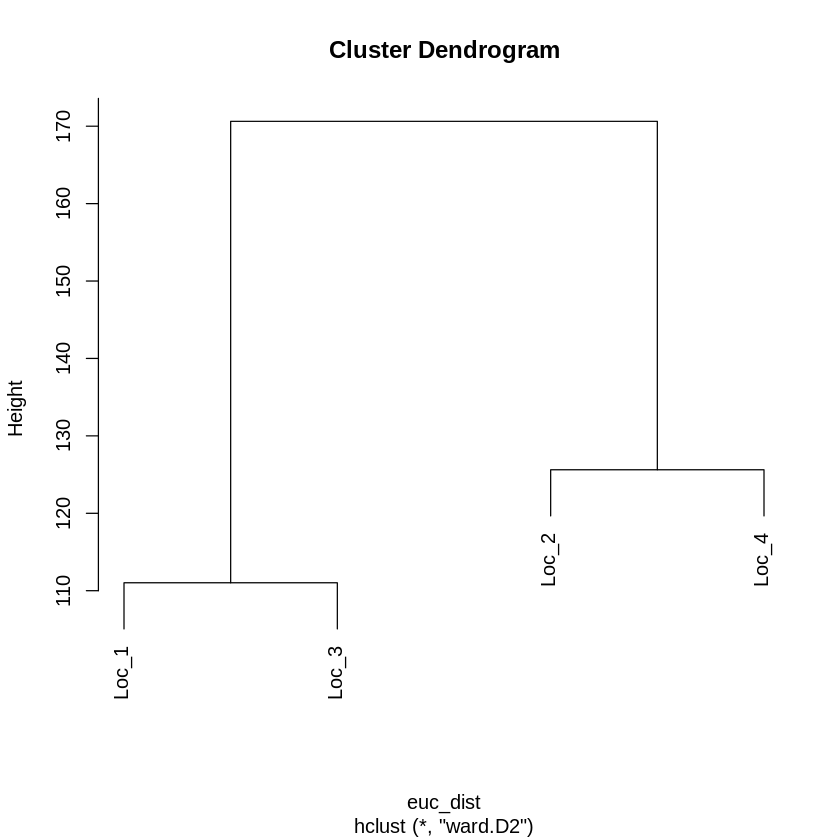

In [88]:
euc_dist <- dist(t(vst_trans_count_tab))
euc_clust <- hclust(euc_dist, method="ward.D2")
plot(euc_clust)

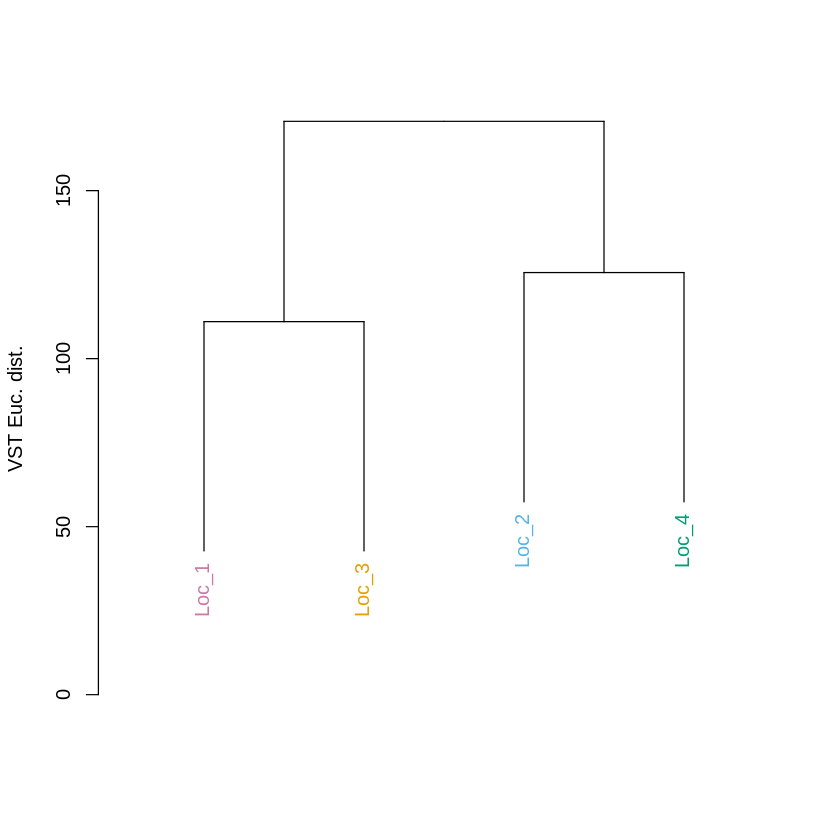

In [101]:
euc_dend <- as.dendrogram(euc_clust, hang=0.4)
dend_cols <- as.character(sample_info_tab$color[order.dendrogram(euc_dend)])
labels_colors(euc_dend) <- dend_cols
plot(euc_dend, ylab="VST Euc. dist.")

# PHYLOSEQ

In [103]:
vst_count_phy <- otu_table(vst_trans_count_tab, taxa_are_rows=T)
sample_info_tab_phy <- sample_data(sample_info_tab)
vst_physeq <- phyloseq(vst_count_phy, sample_info_tab_phy)

In [104]:
vst_pcoa <- ordinate(vst_physeq, method="MDS", distance="euclidean")
eigen_vals <- vst_pcoa$values$Eigenvalues 

In [106]:
write.table(vst_pcoa$vectors, "MDS.tab")
write.table(vst_pcoa$values, "MDS_values.tab")

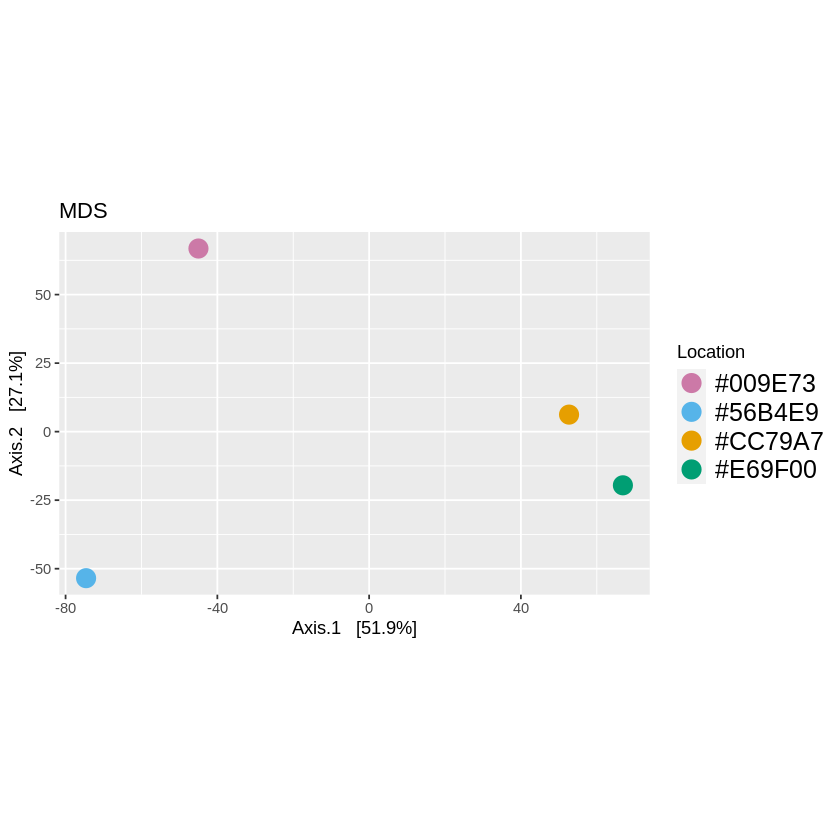

In [171]:
plot_ordination(vst_physeq, vst_pcoa, color= "color") + 
  geom_point(size=5) + labs(col="Location") + 
    coord_fixed(sqrt(eigen_vals[2]/eigen_vals[1])) + ggtitle("MDS") + 
  scale_color_manual(values=unique(sample_info_tab$color[order(sample_info_tab$position)])) + 
  theme(legend.text = element_text(size=15))

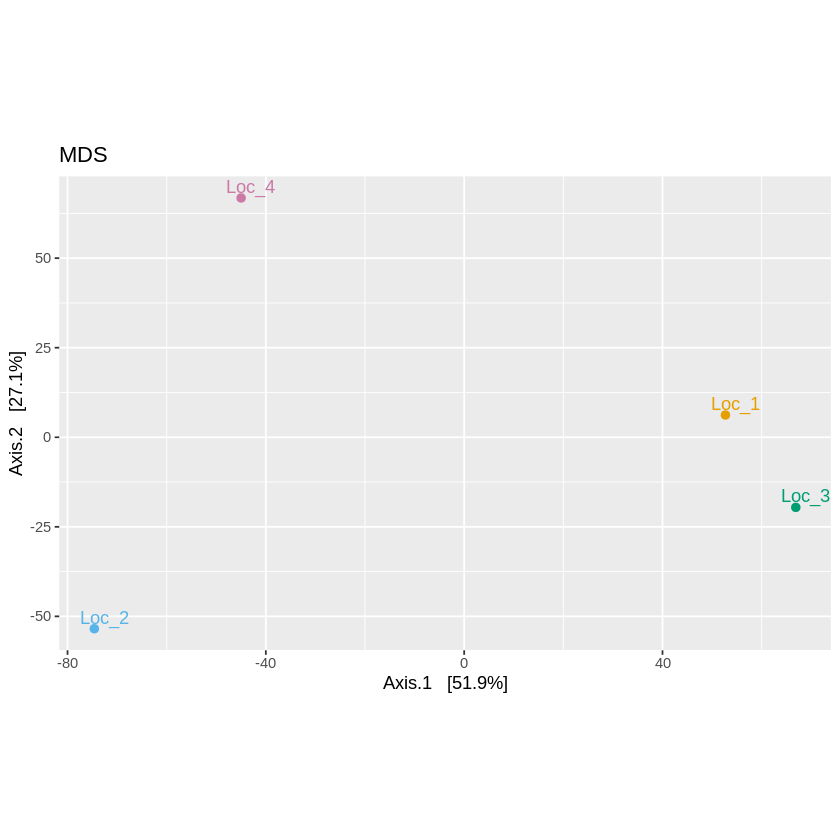

In [138]:
plot_ordination(vst_physeq, vst_pcoa, color="color") + 
  geom_point(size=2) + labs(col="Location") + 
  geom_text(aes(label=rownames(sample_info_tab), hjust=0.3, vjust=-0.4)) + 
  coord_fixed(sqrt(eigen_vals[2]/eigen_vals[1])) + ggtitle("MDS") + 
  scale_color_manual(values=unique(sample_info_tab$color[order(sample_info_tab$position)])) + 
  theme(legend.position="none")

In [144]:
count_tab_phy <- otu_table(count_tab, taxa_are_rows=T)

In [172]:
tax_tab_phy <- tax_table(tax_tab)
ASV_physeq <- phyloseq(count_tab_phy, tax_tab_phy, sample_info_tab)

In [162]:
sample_info_tab_phy <- sample_data(sample_info_tab)

In [164]:
sample_info_tab_phy

,sample_id,ASVs,type,position,color
,<chr>,<int>,<chr>,<chr>,<chr>
Loc_1,L1,45861,Water,Regional,#CC79A7
Loc_2,L2,43940,Water,Regional,#56B4E9
Loc_3,L3,45326,Water,Regional,#E69F00
Loc_4,L4,28184,Water,Regional,#009E73


In [165]:
sample_info_tab

,sample_id,ASVs,type,position,color
,<chr>,<int>,<chr>,<chr>,<chr>
Loc_1,L1,45861,Water,Regional,#CC79A7
Loc_2,L2,43940,Water,Regional,#56B4E9
Loc_3,L3,45326,Water,Regional,#E69F00
Loc_4,L4,28184,Water,Regional,#009E73


In [166]:
vst_count_phy <- otu_table(vst_trans_count_tab, taxa_are_rows=T)
sample_info_tab_phy <- sample_data(sample_info_tab)
vst_physeq <- phyloseq(vst_count_phy, sample_info_tab_phy)

In [168]:
count_tab_phy <- otu_table(count_tab, taxa_are_rows=T)
tax_tab_phy <- tax_table(tax_tab)

count_tab_phy 
tax_tab_phy

,s032059_F_filt.fastq.gz,s032077_F_filt.fastq.gz,s032082_F_filt.fastq.gz,s032087_F_filt.fastq.gz
ASV_1,11283,9137,11681,11275
ASV_2,15075,770,10338,132
ASV_3,1419,13733,2066,4895
ASV_4,3805,4376,3681,7539
ASV_5,1444,3173,1369,6993
ASV_6,2578,3835,1874,3461
ASV_7,3438,1258,5434,573
ASV_8,2608,1716,3972,357
ASV_9,2082,1605,1616,1869
ASV_10,1214,1603,857,3221


,Kingdom,Phylum,Class,Order,Family,Genus
ASV_1,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_2,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_3,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_4,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_5,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307
ASV_6,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,LD29
ASV_7,Bacteria,Actinobacteriota,Actinobacteria,Frankiales,Sporichthyaceae,hgcI_clade
ASV_8,Bacteria,Actinobacteriota,Actinobacteria,Frankiales,Sporichthyaceae,hgcI_clade
ASV_9,Bacteria,Bacteroidota,Kapabacteria,Kapabacteriales,NA,NA
ASV_10,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium_PCC-6307


In [170]:
sample_info_tab

,sample_id,ASVs,type,position,color
,<chr>,<int>,<chr>,<chr>,<chr>
Loc_1,L1,45861,Water,Regional,#CC79A7
Loc_2,L2,43940,Water,Regional,#56B4E9
Loc_3,L3,45326,Water,Regional,#E69F00
Loc_4,L4,28184,Water,Regional,#009E73
